#     Análise de sentimento no twitter - #GunControl
### Autor: Pablo Aguiar Raposo [linkedin](https://www.linkedin.com/in/pablo-aguiar-raposo-71b6b5139/)
### Data da captura dos tweets: 28/06/2022

   Neste projeto farei uma análise de sentimento sobre o controle de armas nos Estados Unidos, por meio da hastag "#GunControl", captando tweets através da API do twitter.
Minha análise seguirá os seguintes passos:

- Limpeza do texto presentes nos tweets:
	. Eliminação de tweets duplicados;
	. Eliminação de caracteres como 'RT', e '@', que poluem os textos sem trazer informação relevante para a análise;
	. Conversão das letras para minúsculo;
	. Remoção de pontuação.	 
- Classificação dos tweets em realaçao ao sentimento expresso;
- Descoberta da proporção de tweets em cada sentimento;
- Descoberta da quantidade de palavras médias presente nos tweets para cada sentimento;
- Nova limpeza nos tweets para analizar as palavras presentes:
    . Tokenização;
    . Remoção de stopwords;
    . Stemização.
- Descoberta das palavras mais frequentes;
- Uso do n-gram para descobrir as 'bigrams' e 'trigrams'. 



### Procedimentos iniciais

In [1]:
# Palavra/frase a ser analisada e quantidade de tweets
palavra = '#GunControl'
ntweet = 50000

In [2]:
# Importação de bibliotecas
import warnings
warnings.filterwarnings("ignore")
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string


from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import time

In [3]:
# autenticação ao twitter developers
#obs: minhas chaves estão em um arquivo separado, para segurança.
import apy
auth = tweepy.OAuthHandler(apy.consumerKey, apy.consumerSecret)
auth.set_access_token(apy.accessToken, apy.accessTokenSecret)
api = tweepy.API(auth)

In [4]:
# Coletando tweets
tweets = tweepy.Cursor(api.search_tweets, q=palavra).items(ntweet)

In [5]:
# Colocando os tweets coletados em uma lista e transformando em um dataframe do Pandas
lista_tweets = []
for i in tweets:
    lista_tweets.append(i.text)
    time.sleep(2) #Necessário, pois no twitter developer só é possível capturar uma quantidade pequena de tweets a cada 15 minutos. 
lista_tweets = pd.DataFrame(lista_tweets)

## Tratando o texto nos tweets


In [6]:
# Imprimindo alguns elementos da lista de tweets para conferência
pd.options.display.max_colwidth = 150
lista_tweets[1:10]

,0
1,RT @VoteBlueUSA2022: Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh
2,RT @TheLCPR: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl #r…
3,RT @VoteBlueUSA2022: Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh
4,RT @VoteBlueUSA2022: Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh
5,RT @VoteBlueUSA2022: Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh
6,RT @TheLCPR: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl #r…
7,RT @ArgonProd: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl…
8,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/wXO4GX8iyp
9,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/NyG5Lx1VRU


In [7]:
# Primeiramente vamos eliminar possíveis tweets duplicados

print(f' quantidade de tweets anteriormente: {len(lista_tweets)}')

lista_tweets.drop_duplicates(inplace = True)

print(f' quantidade de tweets únicos: {len(lista_tweets)}')

 quantidade de tweets anteriormente: 13598
 quantidade de tweets únicos: 8218


In [8]:
# Criando uma nova variável('texto') - para fazer o tratamento do texto nessa variável

lista_tweets['texto'] = lista_tweets[0]
lista_tweets.head(10)

,0,texto
0,RT @VoteBlueUSA2022: Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh,RT @VoteBlueUSA2022: Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh
2,RT @TheLCPR: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl #r…,RT @TheLCPR: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl #r…
7,RT @ArgonProd: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl…,RT @ArgonProd: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl…
8,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/wXO4GX8iyp,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/wXO4GX8iyp
9,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/NyG5Lx1VRU,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/NyG5Lx1VRU
11,"RT @DameDonn: EP.47 OUT NOW‼️\nDiscussing The Wade V. Roe Law, Gun Control, The Yellow Stone River Flood, Cescar Black Ink Crew &amp; More \n\n#ye…","RT @DameDonn: EP.47 OUT NOW‼️\nDiscussing The Wade V. Roe Law, Gun Control, The Yellow Stone River Flood, Cescar Black Ink Crew &amp; More \n\n#ye…"
12,@Jessicam6946 @Snowball1776 No doubt. Get your Vote on! Your voice matters. Do it for the 🌎 . Do it for your neighb… https://t.co/SZ6ROOKx5c,@Jessicam6946 @Snowball1776 No doubt. Get your Vote on! Your voice matters. Do it for the 🌎 . Do it for your neighb… https://t.co/SZ6ROOKx5c
13,"Might get kicked off Twitter for this one. But does the US have a gun problem, or lack of respect for human life.… https://t.co/T8EsNCOcqq","Might get kicked off Twitter for this one. But does the US have a gun problem, or lack of respect for human life.… https://t.co/T8EsNCOcqq"
14,Regulate guns not uteruses. #guncontrol,Regulate guns not uteruses. #guncontrol
15,"Republicans vote against their own interests and those of their great grandchildren. Although don’t realize it, the… https://t.co/zHOauFE7u6","Republicans vote against their own interests and those of their great grandchildren. Although don’t realize it, the… https://t.co/zHOauFE7u6"


In [9]:
#Removendo as letras'RT' e'@', que aparecem no início de vários tweets 
remove_rt = lambda x: re.sub('RT @\w+: ',' ',x)
lista_tweets['txt_limpo'] = lista_tweets['texto'].map(remove_rt)
lista_tweets.head(5)


,0,texto,txt_limpo
0,RT @VoteBlueUSA2022: Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh,RT @VoteBlueUSA2022: Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh,Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh
2,RT @TheLCPR: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl #r…,RT @TheLCPR: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl #r…,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl #r…
7,RT @ArgonProd: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl…,RT @ArgonProd: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl…,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl…
8,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/wXO4GX8iyp,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/wXO4GX8iyp,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/wXO4GX8iyp
9,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/NyG5Lx1VRU,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/NyG5Lx1VRU,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/NyG5Lx1VRU


In [10]:
# Convertendo todas as letras para minúsculo
lista_tweets['txt_limpo'] = lista_tweets['txt_limpo'].str.lower()
lista_tweets.head(5)

,0,texto,txt_limpo
0,RT @VoteBlueUSA2022: Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh,RT @VoteBlueUSA2022: Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh,trevor noah serving truth.\n\n#pride #roevswade #guncontrol https://t.co/7ynymk4mfh
2,RT @TheLCPR: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl #r…,RT @TheLCPR: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl #r…,an honest conversation about red flag laws and potential #government abuses\n\n#redflag #2a #congress #bidenadmin #guncontrol #r…
7,RT @ArgonProd: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl…,RT @ArgonProd: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl…,an honest conversation about red flag laws and potential #government abuses\n\n#redflag #2a #congress #bidenadmin #guncontrol…
8,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/wXO4GX8iyp,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/wXO4GX8iyp,an honest conversation about red flag laws and potential #government abuses\n\n#redflag #2a #congress #bidenadmin… https://t.co/wxo4gx8iyp
9,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/NyG5Lx1VRU,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/NyG5Lx1VRU,an honest conversation about red flag laws and potential #government abuses\n\n#redflag #2a #congress #bidenadmin… https://t.co/nyg5lx1vru


In [11]:
# Removendo pontuação
## Função para remover pontuação e dígitos
def remove_pont(text):
 text = "".join([i for i in text if i not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text

In [12]:
## Aplicando a função
lista_tweets['txt_limpo'] = lista_tweets['txt_limpo'].apply(lambda x: remove_pont(x))
lista_tweets.txt_limpo.head(5)

0                                                          trevor noah serving truth\n\npride roevswade guncontrol httpstco7ynymk4mfh
2          an honest conversation about red flag laws and potential government abuses\n\nredflag 2a congress bidenadmin guncontrol r…
7            an honest conversation about red flag laws and potential government abuses\n\nredflag 2a congress bidenadmin guncontrol…
8    an honest conversation about red flag laws and potential government abuses\n\nredflag 2a congress bidenadmin… httpstcowxo4gx8iyp
9    an honest conversation about red flag laws and potential government abuses\n\nredflag 2a congress bidenadmin… httpstconyg5lx1vru
Name: txt_limpo, dtype: object

In [13]:
# Checando como ficou o texto tratado
lista_tweets.head()

,0,texto,txt_limpo
0,RT @VoteBlueUSA2022: Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh,RT @VoteBlueUSA2022: Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh,trevor noah serving truth\n\npride roevswade guncontrol httpstco7ynymk4mfh
2,RT @TheLCPR: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl #r…,RT @TheLCPR: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl #r…,an honest conversation about red flag laws and potential government abuses\n\nredflag 2a congress bidenadmin guncontrol r…
7,RT @ArgonProd: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl…,RT @ArgonProd: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl…,an honest conversation about red flag laws and potential government abuses\n\nredflag 2a congress bidenadmin guncontrol…
8,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/wXO4GX8iyp,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/wXO4GX8iyp,an honest conversation about red flag laws and potential government abuses\n\nredflag 2a congress bidenadmin… httpstcowxo4gx8iyp
9,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/NyG5Lx1VRU,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/NyG5Lx1VRU,an honest conversation about red flag laws and potential government abuses\n\nredflag 2a congress bidenadmin… httpstconyg5lx1vru


In [14]:
# Criando as variáveis 'polaridade' e 'subjetividade' com o TextBlob, que usaremos para fazer a análise de sentimentos

lista_tweets[['polaridade', 'subjetividade']] = lista_tweets['txt_limpo'].apply(lambda x: pd.Series(TextBlob(x).sentiment))
lista_tweets.head()

,0,texto,txt_limpo,polaridade,subjetividade
0,RT @VoteBlueUSA2022: Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh,RT @VoteBlueUSA2022: Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh,trevor noah serving truth\n\npride roevswade guncontrol httpstco7ynymk4mfh,0.0,0.000000
2,RT @TheLCPR: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl #r…,RT @TheLCPR: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl #r…,an honest conversation about red flag laws and potential government abuses\n\nredflag 2a congress bidenadmin guncontrol r…,0.2,0.633333
7,RT @ArgonProd: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl…,RT @ArgonProd: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl…,an honest conversation about red flag laws and potential government abuses\n\nredflag 2a congress bidenadmin guncontrol…,0.2,0.633333
8,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/wXO4GX8iyp,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/wXO4GX8iyp,an honest conversation about red flag laws and potential government abuses\n\nredflag 2a congress bidenadmin… httpstcowxo4gx8iyp,0.2,0.633333
9,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/NyG5Lx1VRU,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/NyG5Lx1VRU,an honest conversation about red flag laws and potential government abuses\n\nredflag 2a congress bidenadmin… httpstconyg5lx1vru,0.2,0.633333


In [15]:
# Dividindo os tweets pelo sentimento que os representam

for id, linha in lista_tweets['txt_limpo'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(linha)
 negativo = score['neg']
 neutro = score['neu']
 positivo = score['pos']
 composto = score['compound'] #obs: 'composto' é o resultado que fica entre -1 e 1, sendo maior se mais positivo
 if negativo > positivo:
     lista_tweets.loc[id, 'sentimento'] = 'negativo'
 elif negativo < positivo:
     lista_tweets.loc[id, 'sentimento'] = 'positivo'
 else:
     lista_tweets.loc[id, 'sentimento'] = 'neutro'
 lista_tweets.loc[id, 'negativo'] = negativo
 lista_tweets.loc[id, 'neutro'] = neutro
 lista_tweets.loc[id, 'positivo'] = positivo
 lista_tweets.loc[id, 'composto'] = composto

In [16]:
lista_tweets.head()

,0,texto,txt_limpo,polaridade,subjetividade,sentimento,negativo,neutro,positivo,composto
0,RT @VoteBlueUSA2022: Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh,RT @VoteBlueUSA2022: Trevor Noah serving truth.\n\n#Pride #RoeVsWade #GunControl https://t.co/7YNYmK4MFh,trevor noah serving truth\n\npride roevswade guncontrol httpstco7ynymk4mfh,0.0,0.000000,positivo,0.000,0.561,0.439,0.5719
2,RT @TheLCPR: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl #r…,RT @TheLCPR: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl #r…,an honest conversation about red flag laws and potential government abuses\n\nredflag 2a congress bidenadmin guncontrol r…,0.2,0.633333,negativo,0.164,0.685,0.151,-0.0772
7,RT @ArgonProd: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl…,RT @ArgonProd: An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin #GunControl…,an honest conversation about red flag laws and potential government abuses\n\nredflag 2a congress bidenadmin guncontrol…,0.2,0.633333,negativo,0.172,0.670,0.158,-0.0772
8,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/wXO4GX8iyp,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/wXO4GX8iyp,an honest conversation about red flag laws and potential government abuses\n\nredflag 2a congress bidenadmin… httpstcowxo4gx8iyp,0.2,0.633333,negativo,0.172,0.670,0.158,-0.0772
9,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/NyG5Lx1VRU,An Honest Conversation About Red Flag Laws and Potential #Government Abuses\n\n#RedFlag #2A #Congress #BidenAdmin… https://t.co/NyG5Lx1VRU,an honest conversation about red flag laws and potential government abuses\n\nredflag 2a congress bidenadmin… httpstconyg5lx1vru,0.2,0.633333,negativo,0.172,0.670,0.158,-0.0772


In [17]:
# Criando uma função que calcula e cria 2 colunas: o total de tweets de um determinado sentimento e seu percentual 
def contagem_sentimento (df,variavel):
 total = df.loc[:,variavel].value_counts(dropna=False)
 porcentagem=round(df.loc[:,variavel].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,porcentagem],axis=1,keys=['Total','Porcentagem'])

In [18]:
# Utilizando a função
contagem_sentimento_df = pd.DataFrame(contagem_sentimento(lista_tweets,"sentimento"))
contagem_sentimento_df = contagem_sentimento_df.sort_index()
contagem_sentimento_df

,Total,Porcentagem
negativo,3227,39.27
neutro,2470,30.06
positivo,2521,30.68


In [19]:
contagem_sentimento_df.iloc[0][0]

3227.0

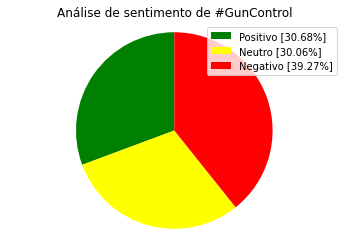

In [20]:
# Visualizando o resultado em um gráfico de pizza

labels = ['Positivo ['+str(contagem_sentimento_df.iloc[2][1])+'%]' , 'Neutro ['+str(contagem_sentimento_df.iloc[1][1])+'%]',
          'Negativo ['+str(contagem_sentimento_df.iloc[0][1])+'%]']
sizes = [contagem_sentimento_df.iloc[2][1], contagem_sentimento_df.iloc[1][1], contagem_sentimento_df.iloc[0][1]]
colors = ['green','yellow', 'red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Análise de sentimento de '+palavra+'' )
plt.axis('equal')
plt.show()

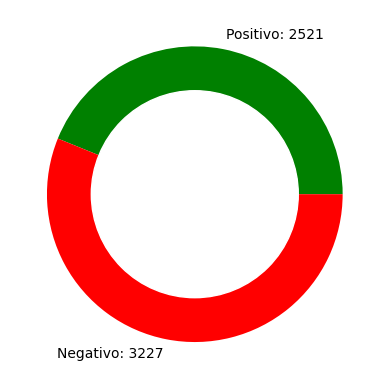

In [21]:
# Comparando os positivos e os negativos ( em valores absolutos)

size=[contagem_sentimento_df.iloc[2][0],contagem_sentimento_df.iloc[0][0]]
my_circle=plt.Circle( (0,0), 0.7, color='white')
names = [f'Positivo: {int(contagem_sentimento_df.iloc[2][0])}', f'Negativo: {int(contagem_sentimento_df.iloc[0][0])}']
plt.pie(size, labels=names, colors=['green','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [22]:
# Vamos analisar se determinado sentimento faz o usuário digitar mais ou menos palavras
## Calculando o número médio de palavras de um tweet por sentimento
	
lista_tweets['n_palavras'] = lista_tweets['txt_limpo'].apply(lambda x: len(str(x).split()))
palavras_df = round(pd.DataFrame(lista_tweets.groupby('sentimento').n_palavras.mean()),2)
palavras_df


,n_palavras
sentimento,
negativo,18.11
neutro,12.94
positivo,18.18


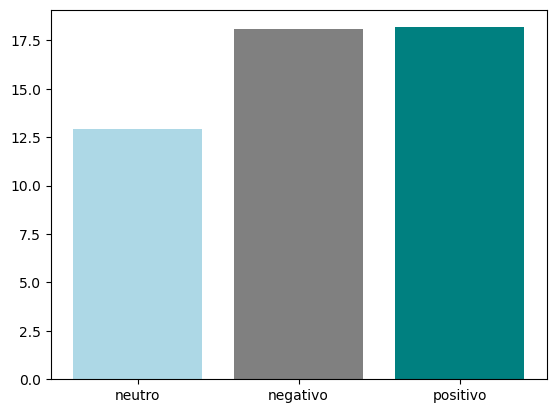

In [23]:
# Visualizando em um barplot

palavras_df2 = palavras_df.reset_index()
palavras_df2 = palavras_df2.sort_values(by=['n_palavras'])
height = palavras_df2.n_palavras
bars = ('positivo', 'negativo', 'neutro')
x_pos = palavras_df2.sentimento
plt.bar(x_pos, height, color=['lightblue','grey','teal'])

plt.show()

Estudos mostram que postagem em redes sociais que possuem senitmento envolvido são mais frequentes e geram maior engajamento. Nessa análise não foi diferente.


In [24]:
# Descobrinndo a quantidade de palavras com CountVectorizer
## CountVectorizer transforma o texto em uma matriz esparsa, contando a frequência de cada palavra em um conjunto de textos.

countVectorizer = CountVectorizer() 
countVector = countVectorizer.fit_transform(lista_tweets['txt_limpo'])
med = countVector.shape[1] / countVector.shape[0]
print(f'número de tweets:{countVector.shape[0]} \nquantidade de palavras:{countVector.shape[1]} \nmédia de palavras por tweet: {round(med,2)}')

número de tweets:8218 
quantidade de palavras:19878 
média de palavras por tweet: 2.42


# Analizando as palavras utilizadas nos tweets

###  Fazendo nova limpeza nos textos

In [25]:
# Realizando tokenização, separando o texto por palavras(caracteres não alfanuméricos) 
def tokeniza(text):
    text = re.split('\W+', text)
    return text

lista_tweets['txt_token'] = lista_tweets['txt_limpo'].apply(lambda x: tokeniza(x.lower()))
lista_tweets.txt_token.head(5)

0                                                               [, trevor, noah, serving, truth, pride, roevswade, guncontrol, httpstco7ynymk4mfh]
2     [, an, honest, conversation, about, red, flag, laws, and, potential, government, abuses, redflag, 2a, congress, bidenadmin, guncontrol, r, ]
7        [, an, honest, conversation, about, red, flag, laws, and, potential, government, abuses, redflag, 2a, congress, bidenadmin, guncontrol, ]
8    [an, honest, conversation, about, red, flag, laws, and, potential, government, abuses, redflag, 2a, congress, bidenadmin, httpstcowxo4gx8iyp]
9    [an, honest, conversation, about, red, flag, laws, and, potential, government, abuses, redflag, 2a, congress, bidenadmin, httpstconyg5lx1vru]
Name: txt_token, dtype: object

In [26]:
# Removendo stopwords
## stop words são palavras com significados "irrelevantes" para uma análise de sentimentos, assim serão retiradas do nosso processo de análise
stopword = nltk.corpus.stopwords.words('english') # em ingês pois é a lingua com maioria de tweets sobre o tema

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

lista_tweets['txt_no_stopword'] = lista_tweets['txt_token'].apply(lambda x: remove_stopwords(x))
lista_tweets.txt_no_stopword.head(5)

0                                               [, trevor, noah, serving, truth, pride, roevswade, guncontrol, httpstco7ynymk4mfh]
2     [, honest, conversation, red, flag, laws, potential, government, abuses, redflag, 2a, congress, bidenadmin, guncontrol, r, ]
7        [, honest, conversation, red, flag, laws, potential, government, abuses, redflag, 2a, congress, bidenadmin, guncontrol, ]
8    [honest, conversation, red, flag, laws, potential, government, abuses, redflag, 2a, congress, bidenadmin, httpstcowxo4gx8iyp]
9    [honest, conversation, red, flag, laws, potential, government, abuses, redflag, 2a, congress, bidenadmin, httpstconyg5lx1vru]
Name: txt_no_stopword, dtype: object

In [27]:
# Aplicando Stemização (reduzir palavras flexionadas/derivadas para sua raíz)

def stemming(text):
    text = [nltk.PorterStemmer().stem(word) for word in text]
    return text

lista_tweets['txt_stem'] = lista_tweets['txt_no_stopword'].apply(lambda x: stemming(x))
lista_tweets.txt_stem.head(5)

0                                     [, trevor, noah, serv, truth, pride, roevswad, guncontrol, httpstco7ynymk4mfh]
2     [, honest, convers, red, flag, law, potenti, govern, abus, redflag, 2a, congress, bidenadmin, guncontrol, r, ]
7        [, honest, convers, red, flag, law, potenti, govern, abus, redflag, 2a, congress, bidenadmin, guncontrol, ]
8    [honest, convers, red, flag, law, potenti, govern, abus, redflag, 2a, congress, bidenadmin, httpstcowxo4gx8iyp]
9    [honest, convers, red, flag, law, potenti, govern, abus, redflag, 2a, congress, bidenadmin, httpstconyg5lx1vru]
Name: txt_stem, dtype: object

In [28]:
# Convertendo o o campo tokenizado em frases denovo
from nltk.tokenize.treebank import TreebankWordDetokenizer
def destokeniza(text): 
    text = TreebankWordDetokenizer().detokenize(text)
    return text
lista_tweets['txt_final'] = lista_tweets['txt_stem'].apply(lambda x: destokeniza(x))
lista_tweets.txt_final.head(5)

0                                  trevor noah serv truth pride roevswad guncontrol httpstco7ynymk4mfh
2          honest convers red flag law potenti govern abus redflag 2a congress bidenadmin guncontrol r
7            honest convers red flag law potenti govern abus redflag 2a congress bidenadmin guncontrol
8    honest convers red flag law potenti govern abus redflag 2a congress bidenadmin httpstcowxo4gx8iyp
9    honest convers red flag law potenti govern abus redflag 2a congress bidenadmin httpstconyg5lx1vru
Name: txt_final, dtype: object

In [29]:
# Criando um data frame com o resultado da limpeza de texto
countVector = countVectorizer.fit_transform(lista_tweets['txt_final'])
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,11,111,111word,112,113,114,11th,11yr,12,122,...,𝐬𝐨𝐦𝐞𝐨𝐧𝐞,𝐭𝐚𝐜𝐤𝐥𝐞,𝐭𝐚𝐤𝐞𝐬,𝐭𝐚𝐥𝐤,𝐭𝐞𝐥𝐥𝐬,𝐭𝐡𝐚𝐭,𝐭𝐡𝐞,𝐭𝐢𝐦𝐞,𝐭𝐨,𝐰𝐢𝐭𝐡
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Colocando o dataFrame em ordem decrescente para melhor visualização
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf = countdf.reset_index()
countdf.columns = ['palavra', 'frequencia']
countdf[1:11] # A primeira palavra é justamente a analisada, logo vou ignora-lá



,palavra,frequencia
1,gun,2270
2,law,707
3,right,684
4,scotu,609
5,us,553
6,control,549
7,roevswad,525
8,court,427
9,bill,423
10,peopl,419


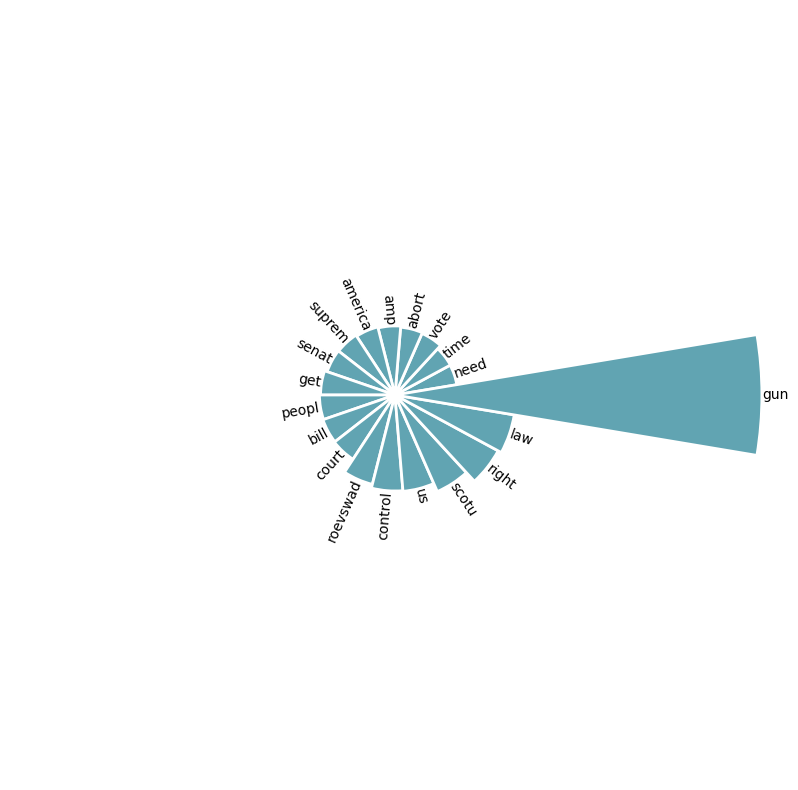

In [31]:
# Visualizando o resultado acima em um gráfico:

plot_df = countdf[1:52]
plot_df = plot_df.sort_values(by=['frequencia'])

plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')


upperLimit = 100
lowerLimit = 30
labelPadding = 4


max = plot_df['frequencia'].max()

slope = (max - lowerLimit) / max
heights = slope * plot_df['frequencia'] + lowerLimit


width = 2*np.pi / len(plot_df['frequencia'])

indexes = list(range(1, len(plot_df['frequencia'])+1))
angles = [element * width for element in indexes]
angles


bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

for bar, angle, height, label in zip(bars,angles, heights, plot_df['palavra']):

    
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

# Utilizando n-gram para descobrir quais palavras são usadas em conjunto
OBS:Um modelo de n -gram é um tipo de modelo de linguagem probabilístico para prever o próximo item em tal sequência na forma de um modelo de Markov d.

In [32]:
## Função n-gram 

def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]

In [33]:
#Econtrando 'bigram', que são palavras(duas) que mais aparecem juntas nos tweets

n2_bigrams = get_top_n_gram(lista_tweets['txt_final'],(2,2),20)
n2_bigrams

[('gun control', 457),
 ('suprem court', 365),
 ('roevswad guncontrol', 223),
 ('red flag', 155),
 ('flag law', 134),
 ('guncontrol law', 111),
 ('gun law', 107),
 ('gun violenc', 106),
 ('guncontrol prochoic', 105),
 ('time coalit', 105),
 ('mass shoot', 103),
 ('prochoic lbgtq', 102),
 ('coalit build', 102),
 ('gun guncontrol', 100),
 ('new york', 99),
 ('voteblue222 guncontrol', 99),
 ('build voteblue222', 97),
 ('lbgtq genz', 97),
 ('genz stake', 97),
 ('stake th', 96)]

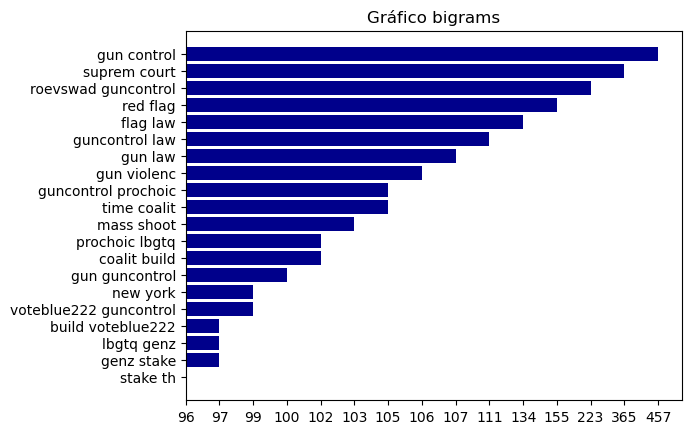

In [34]:
# Plotando o resultado
a = np.array(n2_bigrams)
x = list(reversed(a[:,1]))
y = list(reversed(a[:,0]))
plt.barh(y=y, width=x, color = 'darkblue');
plt.title('Gráfico bigrams' )
plt.show()

In [35]:
# Criando o objeto n3_trigram, que mostra as três palavras mais propensas a estarem juntas no nosso conjunto de tweets  
n3_trigrams = get_top_n_gram(lista_tweets['txt_final'],(3,3),20)
n3_trigrams


[('red flag law', 134),
 ('time coalit build', 101),
 ('guncontrol prochoic lbgtq', 101),
 ('coalit build voteblue222', 97),
 ('build voteblue222 guncontrol', 97),
 ('voteblue222 guncontrol prochoic', 97),
 ('prochoic lbgtq genz', 97),
 ('lbgtq genz stake', 97),
 ('genz stake th', 96),
 ('flag law potenti', 69),
 ('law potenti govern', 69),
 ('potenti govern abus', 69),
 ('redflag 2a congress', 61),
 ('honest convers red', 55),
 ('convers red flag', 55),
 ('govern abus redflag', 49),
 ('abus redflag 2a', 49),
 ('june 28 tomsuozzi', 45),
 ('28 tomsuozzi ny', 45),
 ('tomsuozzi ny democrat', 44)]

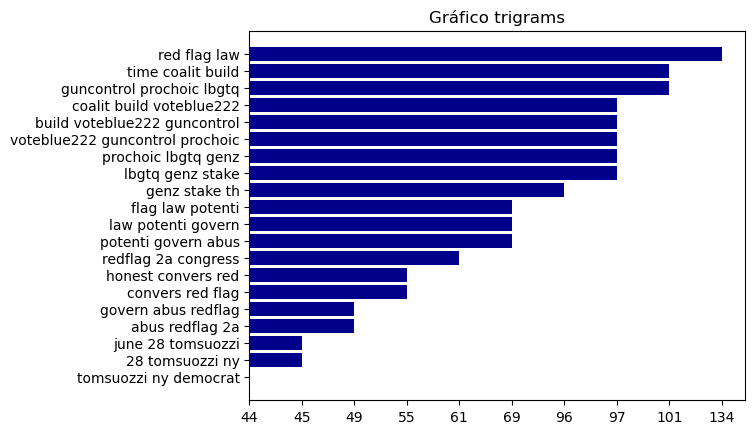

In [36]:
# Plotando o resultado
a2 = np.array(n3_trigrams)
x2 = list(reversed(a2[:,1]))
y2 = list(reversed(a2[:,0]))
plt.barh(y=y2, width=x2, color = 'darkblue');
plt.title('Gráfico trigrams' )
plt.show()

### Terminamos assim a análise de sentimento!

Dúvidas, sugestões e críticas: entre em contato!   :)
e-mail: pabloaguiar92@hotmail.com linkedin: https://www.linkedin.com/in/pablo-aguiar-raposo-71b6b5139/ 
github: https://github.com/Pablo-aguiarr